In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd 
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Air Quality Analysis/city_day.csv')

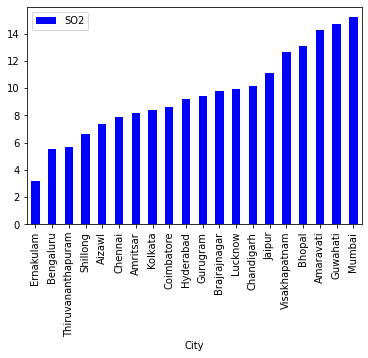

In [ ]:
data
data[['SO2','City']].groupby(["City"]).mean().sort_values(by='SO2').head(20).plot.bar(color='b')
plt.show() 

In [ ]:
City=data.groupby(data.City)
Delhi=City.get_group("Delhi")
Delhi

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


In [ ]:
for column in Delhi[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = Delhi[column].isna().sum()
    print((count/2009)*100)

Delhi = Delhi.drop(columns = ['Xylene'])
Delhi

PM2.5
0.09955201592832255
NO
0.09955201592832255
NO2
0.09955201592832255
NOx
0.0
NH3
0.44798407167745147
CO
0.0
SO2
5.47536087605774
O3
4.181184668989547
Benzene
0.0
Toluene
0.0
Xylene
38.87506222000995


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,114.0,Moderate


In [ ]:
Delhi = Delhi.drop(columns = ['PM10'])
for column in Delhi[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']]:
    m = Delhi[column].mean(skipna = True)
    print(column, m)
    Delhi[column].fillna(m, inplace = True)

Delhi

PM2.5 117.19615346287999
NO 38.98559541604395
NO2 50.785181863477845
NOx 58.56702339472371
NH3 41.99714999999987
CO 1.9760527625684374
SO2 15.901253291205885
O3 51.32361038961032
Benzene 3.544479840716772
Toluene 17.185042309606786


,City,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,472.0,Severe
10230,Delhi,2015-01-02,186.18,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,454.0,Severe
10231,Delhi,2015-01-03,87.18,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,143.0,Moderate
10232,Delhi,2015-01-04,151.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,112.0,Moderate
12234,Delhi,2020-06-28,59.52,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,196.0,Moderate
12235,Delhi,2020-06-29,44.86,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,233.0,Poor
12236,Delhi,2020-06-30,39.80,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,114.0,Moderate


In [ ]:
print(Delhi['AQI'].mean(skipna = True))
Delhi['AQI'].fillna(259, inplace = True)
Delhi['AQI_Bucket'].value_counts()


259.48774387193595


Poor            542
Very Poor       520
Moderate        519
Severe          239
Satisfactory    158
Good             21
Name: AQI_Bucket, dtype: int64

In [ ]:
Delhi['AQI_Bucket'].fillna('Poor', inplace = True)
Delhi['Date'] = pd.to_datetime(Delhi['Date'])
Delhi['City'] = Delhi['City'].str.lower()
Delhi['AQI_Bucket'] = Delhi['AQI_Bucket'].str.lower()
Delhi

,City,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
10229,delhi,2015-01-01,313.22,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,472.0,severe
10230,delhi,2015-01-02,186.18,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,454.0,severe
10231,delhi,2015-01-03,87.18,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,143.0,moderate
10232,delhi,2015-01-04,151.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,319.0,very poor
10233,delhi,2015-01-05,146.60,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,325.0,very poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,delhi,2020-06-27,39.80,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,112.0,moderate
12234,delhi,2020-06-28,59.52,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,196.0,moderate
12235,delhi,2020-06-29,44.86,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,233.0,poor
12236,delhi,2020-06-30,39.80,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,114.0,moderate


In [ ]:
Delhi['month'] = pd.DatetimeIndex(Delhi['Date']).month
Delhi['year'] = pd.DatetimeIndex(Delhi['Date']).year
Delhi.head()
Delhi

,City,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,month,year
10229,delhi,2015-01-01,313.22,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,472.0,severe,1,2015
10230,delhi,2015-01-02,186.18,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,454.0,severe,1,2015
10231,delhi,2015-01-03,87.18,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,143.0,moderate,1,2015
10232,delhi,2015-01-04,151.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,319.0,very poor,1,2015
10233,delhi,2015-01-05,146.60,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,325.0,very poor,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,delhi,2020-06-27,39.80,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,112.0,moderate,6,2020
12234,delhi,2020-06-28,59.52,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,196.0,moderate,6,2020
12235,delhi,2020-06-29,44.86,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,233.0,poor,6,2020
12236,delhi,2020-06-30,39.80,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,114.0,moderate,6,2020


In [ ]:
Delhi = Delhi [ Delhi ["year"]>=2017]
Delhi

,City,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,month,year
10960,delhi,2017-01-01,191.50,103.24,66.19,55.29,55.92,1.31,25.13,50.03,8.39,19.94,332.0,very poor,1,2017
10961,delhi,2017-01-02,247.79,221.03,95.55,80.85,66.57,1.47,22.29,47.86,8.96,18.92,384.0,very poor,1,2017
10962,delhi,2017-01-03,255.33,155.29,90.79,53.89,58.97,1.28,25.33,42.90,7.65,13.96,373.0,very poor,1,2017
10963,delhi,2017-01-04,248.01,186.07,91.07,71.88,68.53,1.55,23.11,41.13,7.26,16.51,439.0,severe,1,2017
10964,delhi,2017-01-05,215.42,141.69,87.15,64.41,61.04,1.24,25.15,41.95,5.73,12.89,318.0,very poor,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,delhi,2020-06-27,39.80,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,112.0,moderate,6,2020
12234,delhi,2020-06-28,59.52,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,196.0,moderate,6,2020
12235,delhi,2020-06-29,44.86,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,233.0,poor,6,2020
12236,delhi,2020-06-30,39.80,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,114.0,moderate,6,2020


[Text(0.5, 0, 'PM2.5'),
 Text(1.5, 0, 'NO'),
 Text(2.5, 0, 'NO2'),
 Text(3.5, 0, 'NOx'),
 Text(4.5, 0, 'NH3'),
 Text(5.5, 0, 'CO'),
 Text(6.5, 0, 'SO2'),
 Text(7.5, 0, 'O3'),
 Text(8.5, 0, 'Benzene'),
 Text(9.5, 0, 'Toluene'),
 Text(10.5, 0, 'AQI')]

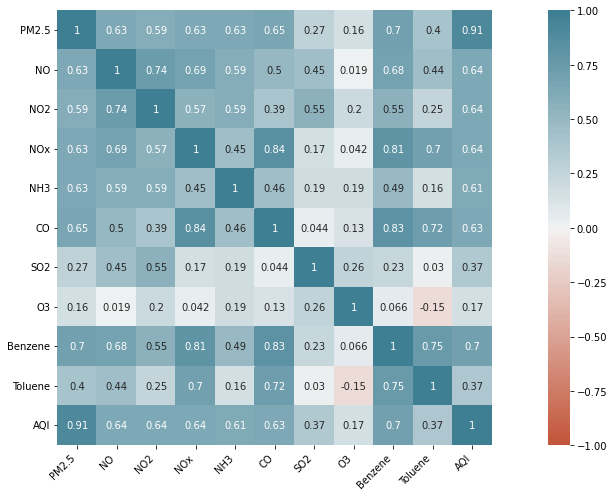

In [ ]:
df_corr = Delhi.corr()
df_corr = df_corr.drop(['year','month'],axis = 1)
df_corr = df_corr.drop(['year','month'],axis = 0)
plt.figure(figsize=(20,8))
ax = sns.heatmap( df_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


In [ ]:
delhi_2020 = Delhi[Delhi['year'] == 2020] 
delhi_2020

,City,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,month,year
12055,delhi,2020-01-01,372.14,109.53,64.18,135.00,56.85,3.15,18.49,39.58,8.50,60.79,492.0,severe,1,2020
12056,delhi,2020-01-02,327.04,120.76,64.80,143.71,58.26,3.32,19.95,36.50,9.36,73.11,485.0,severe,1,2020
12057,delhi,2020-01-03,228.90,111.09,55.65,131.13,53.02,2.80,14.93,27.82,6.96,66.80,426.0,severe,1,2020
12058,delhi,2020-01-04,220.60,86.58,57.67,110.20,53.46,2.20,12.85,29.94,6.81,48.18,366.0,very poor,1,2020
12059,delhi,2020-01-05,170.21,29.99,48.25,54.30,47.94,1.23,9.59,30.21,3.70,28.90,354.0,very poor,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,delhi,2020-06-27,39.80,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,112.0,moderate,6,2020
12234,delhi,2020-06-28,59.52,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,196.0,moderate,6,2020
12235,delhi,2020-06-29,44.86,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,233.0,poor,6,2020
12236,delhi,2020-06-30,39.80,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,114.0,moderate,6,2020


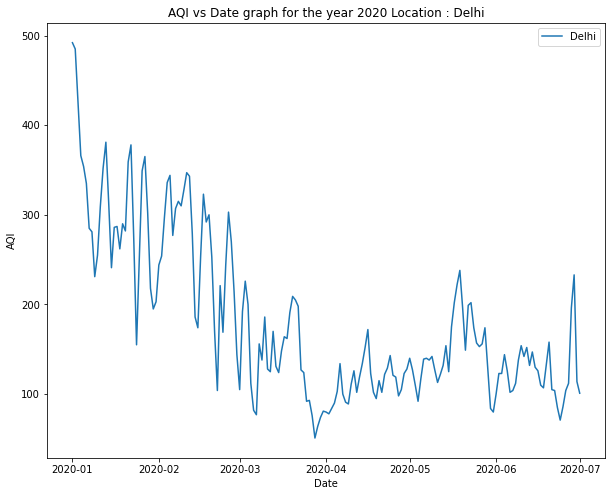

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(delhi_2020['Date'],delhi_2020['AQI'])
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI vs Date graph for the year 2020 Location : Delhi")
plt.legend(["Delhi"])

[]

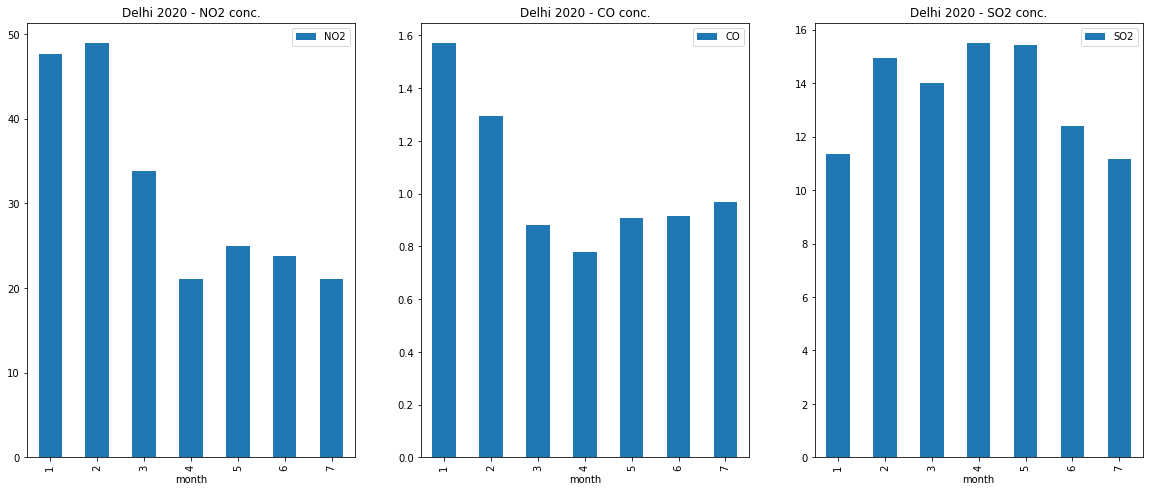

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,8))
ax1.title.set_text("Delhi 2020 - NO2 conc.")
delhi_2020.groupby(delhi_2020['month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax1)
ax2.title.set_text("Delhi 2020 - CO conc.")
delhi_2020.groupby(delhi_2020['month']).mean().plot(y = ['CO'],kind = 'bar',ax = ax2)
ax3.title.set_text("Delhi 2020 - SO2 conc.")
delhi_2020.groupby(delhi_2020['month']).mean().plot(y = ['SO2'],kind = 'bar',ax = ax3)

plt.plot()

In [ ]:
delhi_2019 = Delhi[Delhi['year'] == 2019] 
delhi_2019

,City,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,month,year
11690,delhi,2019-01-01,287.34,92.04,69.46,121.07,56.66,2.54,17.77,39.58,8.09,48.84,475.0,severe,1,2019
11691,delhi,2019-01-02,331.20,101.08,75.06,133.85,63.63,2.78,18.27,43.30,10.04,58.70,501.0,severe,1,2019
11692,delhi,2019-01-03,355.40,77.92,66.20,106.99,61.02,2.55,15.12,39.77,8.91,56.57,537.0,severe,1,2019
11693,delhi,2019-01-04,246.46,47.83,57.53,74.39,53.09,2.01,13.22,28.75,6.78,40.50,432.0,severe,1,2019
11694,delhi,2019-01-05,262.53,64.97,60.35,90.67,56.49,2.23,15.59,36.33,8.50,51.69,440.0,severe,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12050,delhi,2019-12-27,240.07,28.66,54.60,54.95,52.64,1.39,7.88,27.55,4.62,32.86,372.0,very poor,12,2019
12051,delhi,2019-12-28,275.60,60.13,55.98,83.47,50.47,1.96,10.26,27.92,6.70,39.22,425.0,severe,12,2019
12052,delhi,2019-12-29,326.79,32.73,57.76,61.51,49.61,1.86,10.25,35.11,6.28,33.00,455.0,severe,12,2019
12053,delhi,2019-12-30,333.43,54.97,55.61,79.04,50.75,2.24,11.15,26.44,8.00,47.12,506.0,severe,12,2019


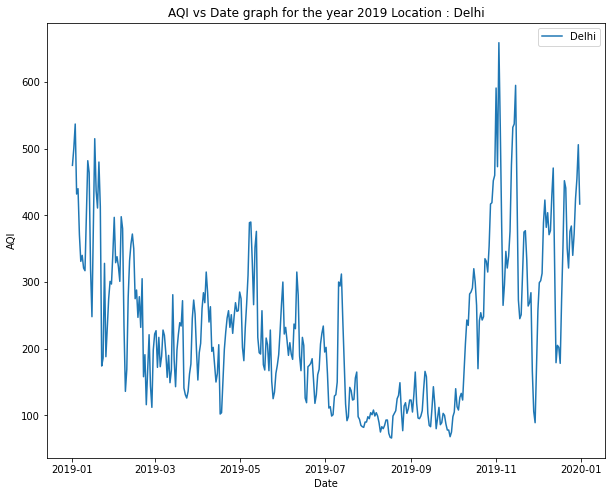

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(delhi_2019['Date'],delhi_2019['AQI'])
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI vs Date graph for the year 2019 Location : Delhi")
plt.legend(["Delhi"])

[]

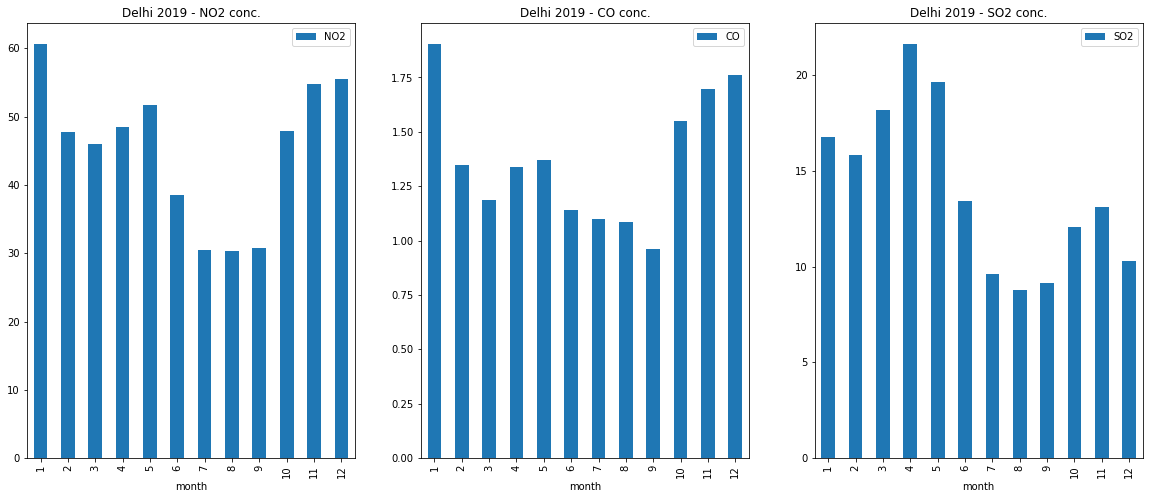

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,8))
ax1.title.set_text("Delhi 2019 - NO2 conc.")
delhi_2019.groupby(delhi_2019['month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax1)
ax2.title.set_text("Delhi 2019 - CO conc.")
delhi_2019.groupby(delhi_2019['month']).mean().plot(y = ['CO'],kind = 'bar',ax = ax2)
ax3.title.set_text("Delhi 2019 - SO2 conc.")
delhi_2019.groupby(delhi_2019['month']).mean().plot(y = ['SO2'],kind = 'bar',ax = ax3)

plt.plot()



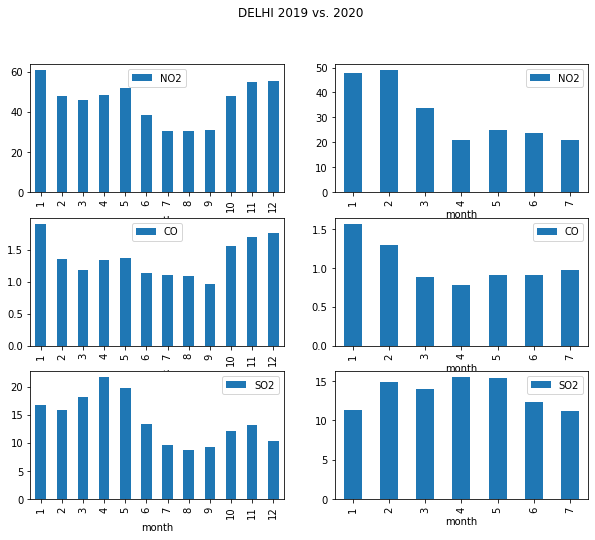

In [ ]:
fig,ax = plt.subplots(3,2,figsize = (10,8))
fig.suptitle("DELHI 2019 vs. 2020")
delhi_2019.groupby(delhi_2019['month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax[0,0])
delhi_2020.groupby(delhi_2020['month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax[0,1])
delhi_2019.groupby(delhi_2019['month']).mean().plot(y = ['CO'],kind = 'bar',ax =ax[1,0])
delhi_2020.groupby(delhi_2020['month']).mean().plot(y = ['CO'],kind = 'bar',ax =ax[1,1])
delhi_2019.groupby(delhi_2019['month']).mean().plot(y = ['SO2'],kind = 'bar',ax =ax[2,0])
delhi_2020.groupby(delhi_2020['month']).mean().plot(y = ['SO2'],kind = 'bar',ax =ax[2,1])